# Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
# %matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_json('logins.json')

In [3]:
# take a look
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
# make sure login time are Datetime object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# need to add column wih ones
df['login_count'] = 1

In [6]:
df.head()

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [7]:
# aggregate by 15 min window
df15 = df.groupby(pd.Grouper(key='login_time', freq='15min')).login_count.count()

In [8]:
df15.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: login_count, dtype: int64

<IPython.core.display.Javascript object>


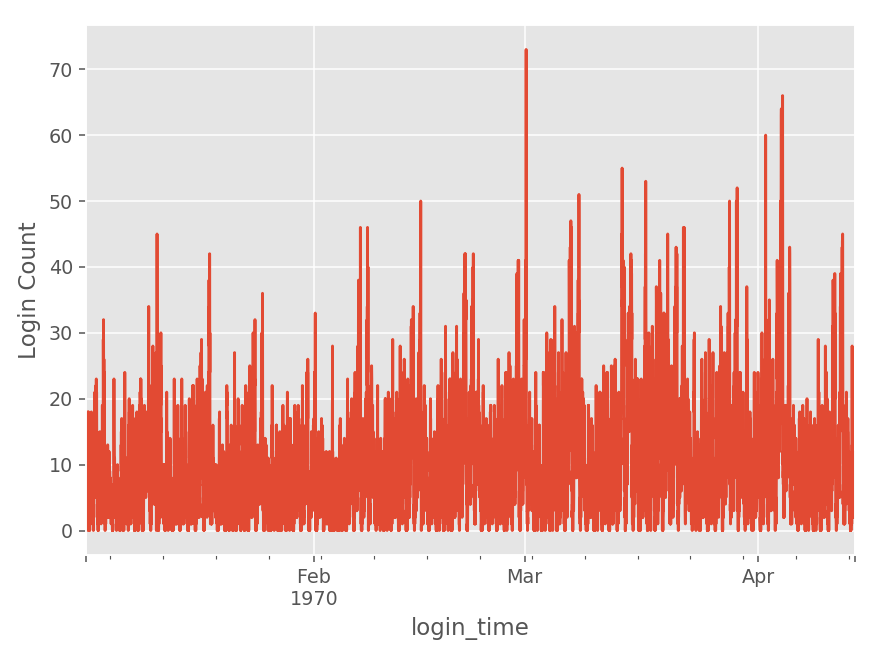

In [9]:
# plot time series
_ , ax = plt.subplots()
_ = df15.plot(ax = ax)
_ = ax.set_ylabel('Login Count')
# make sure label doesn't get clipped (optional)
plt.tight_layout()

In [10]:
# add moving average column
df15 = pd.concat([df15, df15.rolling('24H').mean()], axis = 1)

In [11]:
# change moving average name
colnames = df15.columns.values
colnames[-1] = 'login_count_avg'
df15.columns = colnames
# NOTE: cannot use df.rename because each column has the same name

In [12]:
df15.head()

,login_count,login_count_avg
login_time,,
1970-01-01 20:00:00,2,2.000000
1970-01-01 20:15:00,6,4.000000
1970-01-01 20:30:00,9,5.666667
1970-01-01 20:45:00,7,6.000000
1970-01-01 21:00:00,1,5.000000


<IPython.core.display.Javascript object>


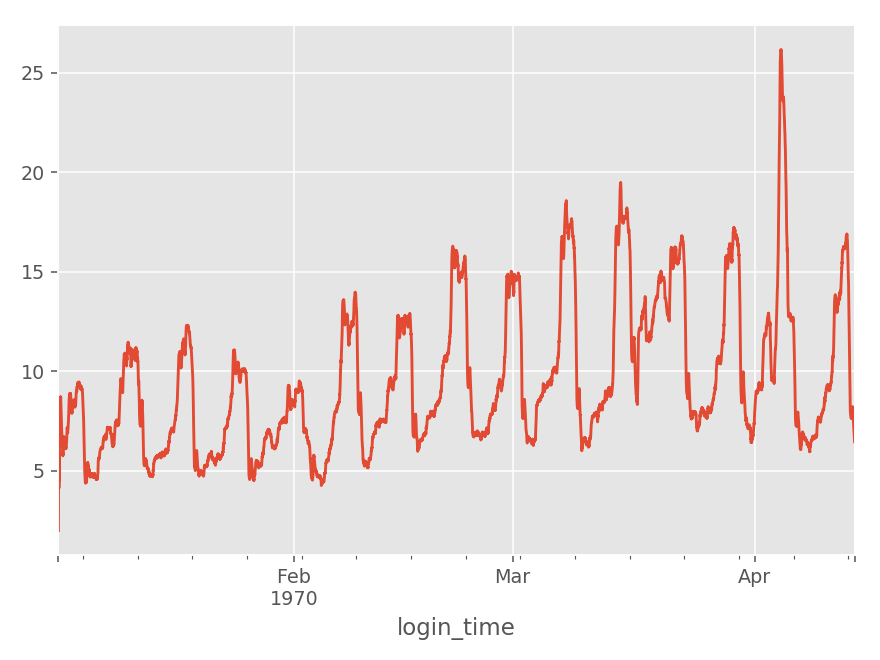

In [13]:
# data is very noisy, use window function
_ , axw = plt.subplots()
_ = df15.login_count_avg.plot(ax = axw)
plt.tight_layout()

In [14]:
# There are periodic events where the average number of logins is high
# get encoded day of the week
df15['week_day_code'] = df15.index.dayofweek

In [15]:
# create new columns for logins on weekends up to Monday early morning
crit = df15.week_day_code.isin([5,6]) | ((df15.week_day_code == 5) & (df15.index.hour < 7))
df15.loc[ crit ,'login_weekend'] = df15.login_count_avg

<IPython.core.display.Javascript object>


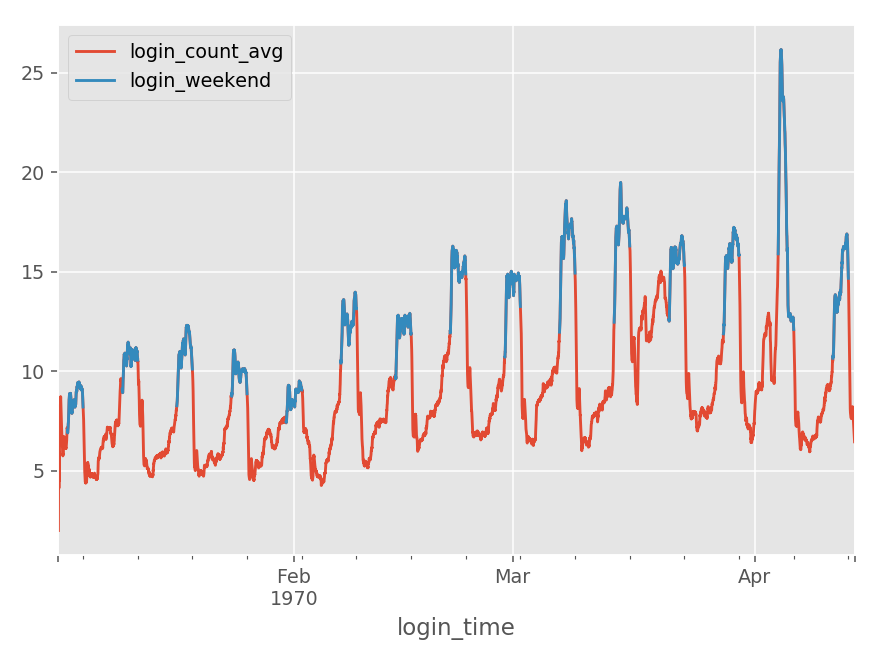

In [16]:
_ , axw2 = plt.subplots()
_ = df15[['login_count_avg', 'login_weekend']].plot(ax = axw2)
plt.tight_layout()

### Observations:
* Number of login is much higher on Saturdays and Sundays until Monday early morning.
* There is a higher peak on April 4th which may be due to a seasonal event.
* Early april and mid-March we can see local peaks that could be explain by a long holiday weekend for instance.